## ADVANCED REGRESSION ASSIGNMENT
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. 

 

The company is looking at prospective properties to buy to enter the market.

You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

 

The company wants to know:

Which variables are significant in predicting the price of a house, and

How well those variables describe the price of a house.

 

Also, determine the optimal value of lambda for ridge and lasso regression.

 

### Business Goal 

 

You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for the management to understand the pricing dynamics of a new market.

#### Please Note: 
* ### install ipywidgets and enable widgets in jupyterlab and notebook if not installed.

#### install jupyterlab_manager as per your version if error occurs(check the version in the error)

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
from matplotlib.pyplot import xticks
%matplotlib inline
sns.set(style="whitegrid")
sns.set(rc={'figure.figsize':(12,8)})
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_colwidth', -1)
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV


In [3]:
# importing for ipywidgets
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets


In [4]:
# importing datetime for date features
import datetime
dt = datetime.datetime.now()


#### Import The data

housing_data=pd.read_csv('Housing.csv')

In [5]:
# Importing Housing.csv
housing = pd.read_csv('Housing.csv')
# Looking at the first five rows
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
housing.shape

(1460, 81)

In [7]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

### Data Cleaning

In [8]:
#function for missing values in columns
def missing_coldata(df):
    missin_col = pd.DataFrame(round(df.isnull().sum().sort_values(ascending=False)/len(df.index)*100,1), columns=['% of missing value'])
    missin_col['Count of Missing Values'] = df.isnull().sum()
    return missin_col


In [9]:
missing_coldata(housing)[missing_coldata(housing)["% of missing value"]>0]

,% of missing value,Count of Missing Values
PoolQC,99.5,1453
MiscFeature,96.3,1406
Alley,93.8,1369
Fence,80.8,1179
FireplaceQu,47.3,690
LotFrontage,17.7,259
GarageCond,5.5,81
GarageType,5.5,81
GarageYrBlt,5.5,81
GarageFinish,5.5,81


In [10]:
#Features with more than 45% NaN data, shows that these are optional features
housing[["Fence","PoolQC","MiscFeature","Alley","FireplaceQu"]].describe()

,Fence,PoolQC,MiscFeature,Alley,FireplaceQu
count,281,7,54,91,770
unique,4,3,4,2,5
top,MnPrv,Gd,Shed,Grvl,Gd
freq,157,3,49,50,380


##### Dropping the columns having more than 45% missing values

In [11]:
housing=housing.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu'],axis=1)

In [12]:
# Checking the duplicates 

In [13]:
dupcheck=housing[housing.duplicated(["Id"])]
dupcheck

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


### Feature Extraction

Categorical numeric and datetime features are present in the data


In [14]:
housing["YearBuilt"]=pd.to_datetime(housing["YearBuilt"], format='%Y')
housing["YearRemodAdd"]=pd.to_datetime(housing["YearRemodAdd"], format='%Y')
housing["YrSold"]=pd.to_datetime(housing["YrSold"], format='%Y')
#housing["GarageYrBlt"]=pd.to_datetime(housing["GarageYrBlt"], format='%Y')

In [15]:
# extracting features from year like age of house, remod years etc
housing['House_age'] = dt.year - housing['YearBuilt'].dt.year
housing['Remodified_years'] = dt.year - housing['YearRemodAdd'].dt.year
housing['LastSold_years'] = dt.year - housing['YrSold'].dt.year
#housing['Garage_age'] = dt.year - housing['GarageYrBlt'].dt.year

In [16]:
housing.drop(['YearBuilt','YearRemodAdd','YrSold'], axis=1, inplace=True)

In [17]:
housing[['House_age','Remodified_years','LastSold_years']].head()

,House_age,Remodified_years,LastSold_years
0,16,16,11
1,43,43,12
2,18,17,11
3,104,49,13
4,19,19,11


#### Looking at the above features we can understand from their description in data dictionary that few of these are numeric but have to be categorical, 
* ##### "MSSubClass" which represents the type of dwelling in the house and this is clearly not numeric, converting it into categorical
* ##### OverallQual: Rates the overall material and finish of the house and OverallCond: Rates the overall condition of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       and so on

In [18]:
housing['MSSubClass'] = housing['MSSubClass'].astype('category')


In [19]:
orders=[10,9,8,7,6,5,4,3,2,1]
housing[["OverallQual","OverallCond"]] = housing[["OverallQual","OverallCond"]].astype("category",ordered=True,categories=orders)


In [20]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

In [21]:
numdata=housing[list(housing.select_dtypes(numerics).columns)]
catdata=housing[list(housing.select_dtypes(exclude=numerics).columns)]

In [22]:
# describe() categorical features
@interact
def count_cat(col=catdata.iloc[:,1:].columns):
    return housing[col].describe()

interactive(children=(Dropdown(description='col', options=('MSZoning', 'Street', 'LotShape', 'LandContour', 'U…

In [23]:
# value counts of each category of categorical features
@interact
def catcount(col=catdata.iloc[:,1:]):
    cat_count = housing[col].value_counts()
    return sns.barplot(cat_count.index, cat_count.values)

interactive(children=(Dropdown(description='col', options=('MSZoning', 'Street', 'LotShape', 'LandContour', 'U…

In [24]:
# value counts of each category of categorical features
@interact
def catcount(col=catdata.iloc[:,1:]):
    labels = housing[col].astype('category').cat.categories.tolist()
    counts = housing[col].value_counts()
    fig, ax = plt.subplots()
    ax.pie([counts[var_cat] for var_cat in labels], labels=labels, autopct='%1i%%') 
    ax.axis('equal')
    plt.show()

interactive(children=(Dropdown(description='col', options=('MSZoning', 'Street', 'LotShape', 'LandContour', 'U…

#### Drop: Categorical features with negligible variance

In [25]:
# analysing numerical features

In [26]:
@interact
def outliers( y=numdata.iloc[:,1:].columns):
    return housing.plot(kind='box',y=y,figsize=[6,5]) 

interactive(children=(Dropdown(description='y', options=('LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1',…

In [27]:
@interact
def described(col=numdata.iloc[:,1:].columns):
    return housing[col].describe()

interactive(children=(Dropdown(description='col', options=('LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1…

#### Drop: Numeric features with negligible variance

#### Correlation between SalePrice (dependent) and numeric(predictors)

In [28]:
housing.iloc[:,1:].corr().SalePrice.sort_values(ascending=False)

SalePrice           1.000000
GrLivArea           0.708624
GarageCars          0.640409
GarageArea          0.623431
TotalBsmtSF         0.613581
1stFlrSF            0.605852
FullBath            0.560664
TotRmsAbvGrd        0.533723
GarageYrBlt         0.486362
MasVnrArea          0.477493
Fireplaces          0.466929
BsmtFinSF1          0.386420
LotFrontage         0.351799
WoodDeckSF          0.324413
2ndFlrSF            0.319334
OpenPorchSF         0.315856
HalfBath            0.284108
LotArea             0.263843
BsmtFullBath        0.227122
BsmtUnfSF           0.214479
BedroomAbvGr        0.168213
ScreenPorch         0.111447
PoolArea            0.092404
MoSold              0.046432
3SsnPorch           0.044584
LastSold_years      0.028923
BsmtFinSF2         -0.011378
BsmtHalfBath       -0.016844
MiscVal            -0.021190
LowQualFinSF       -0.025606
EnclosedPorch      -0.128578
KitchenAbvGr       -0.135907
Remodified_years   -0.507101
House_age          -0.522897
Name: SalePric

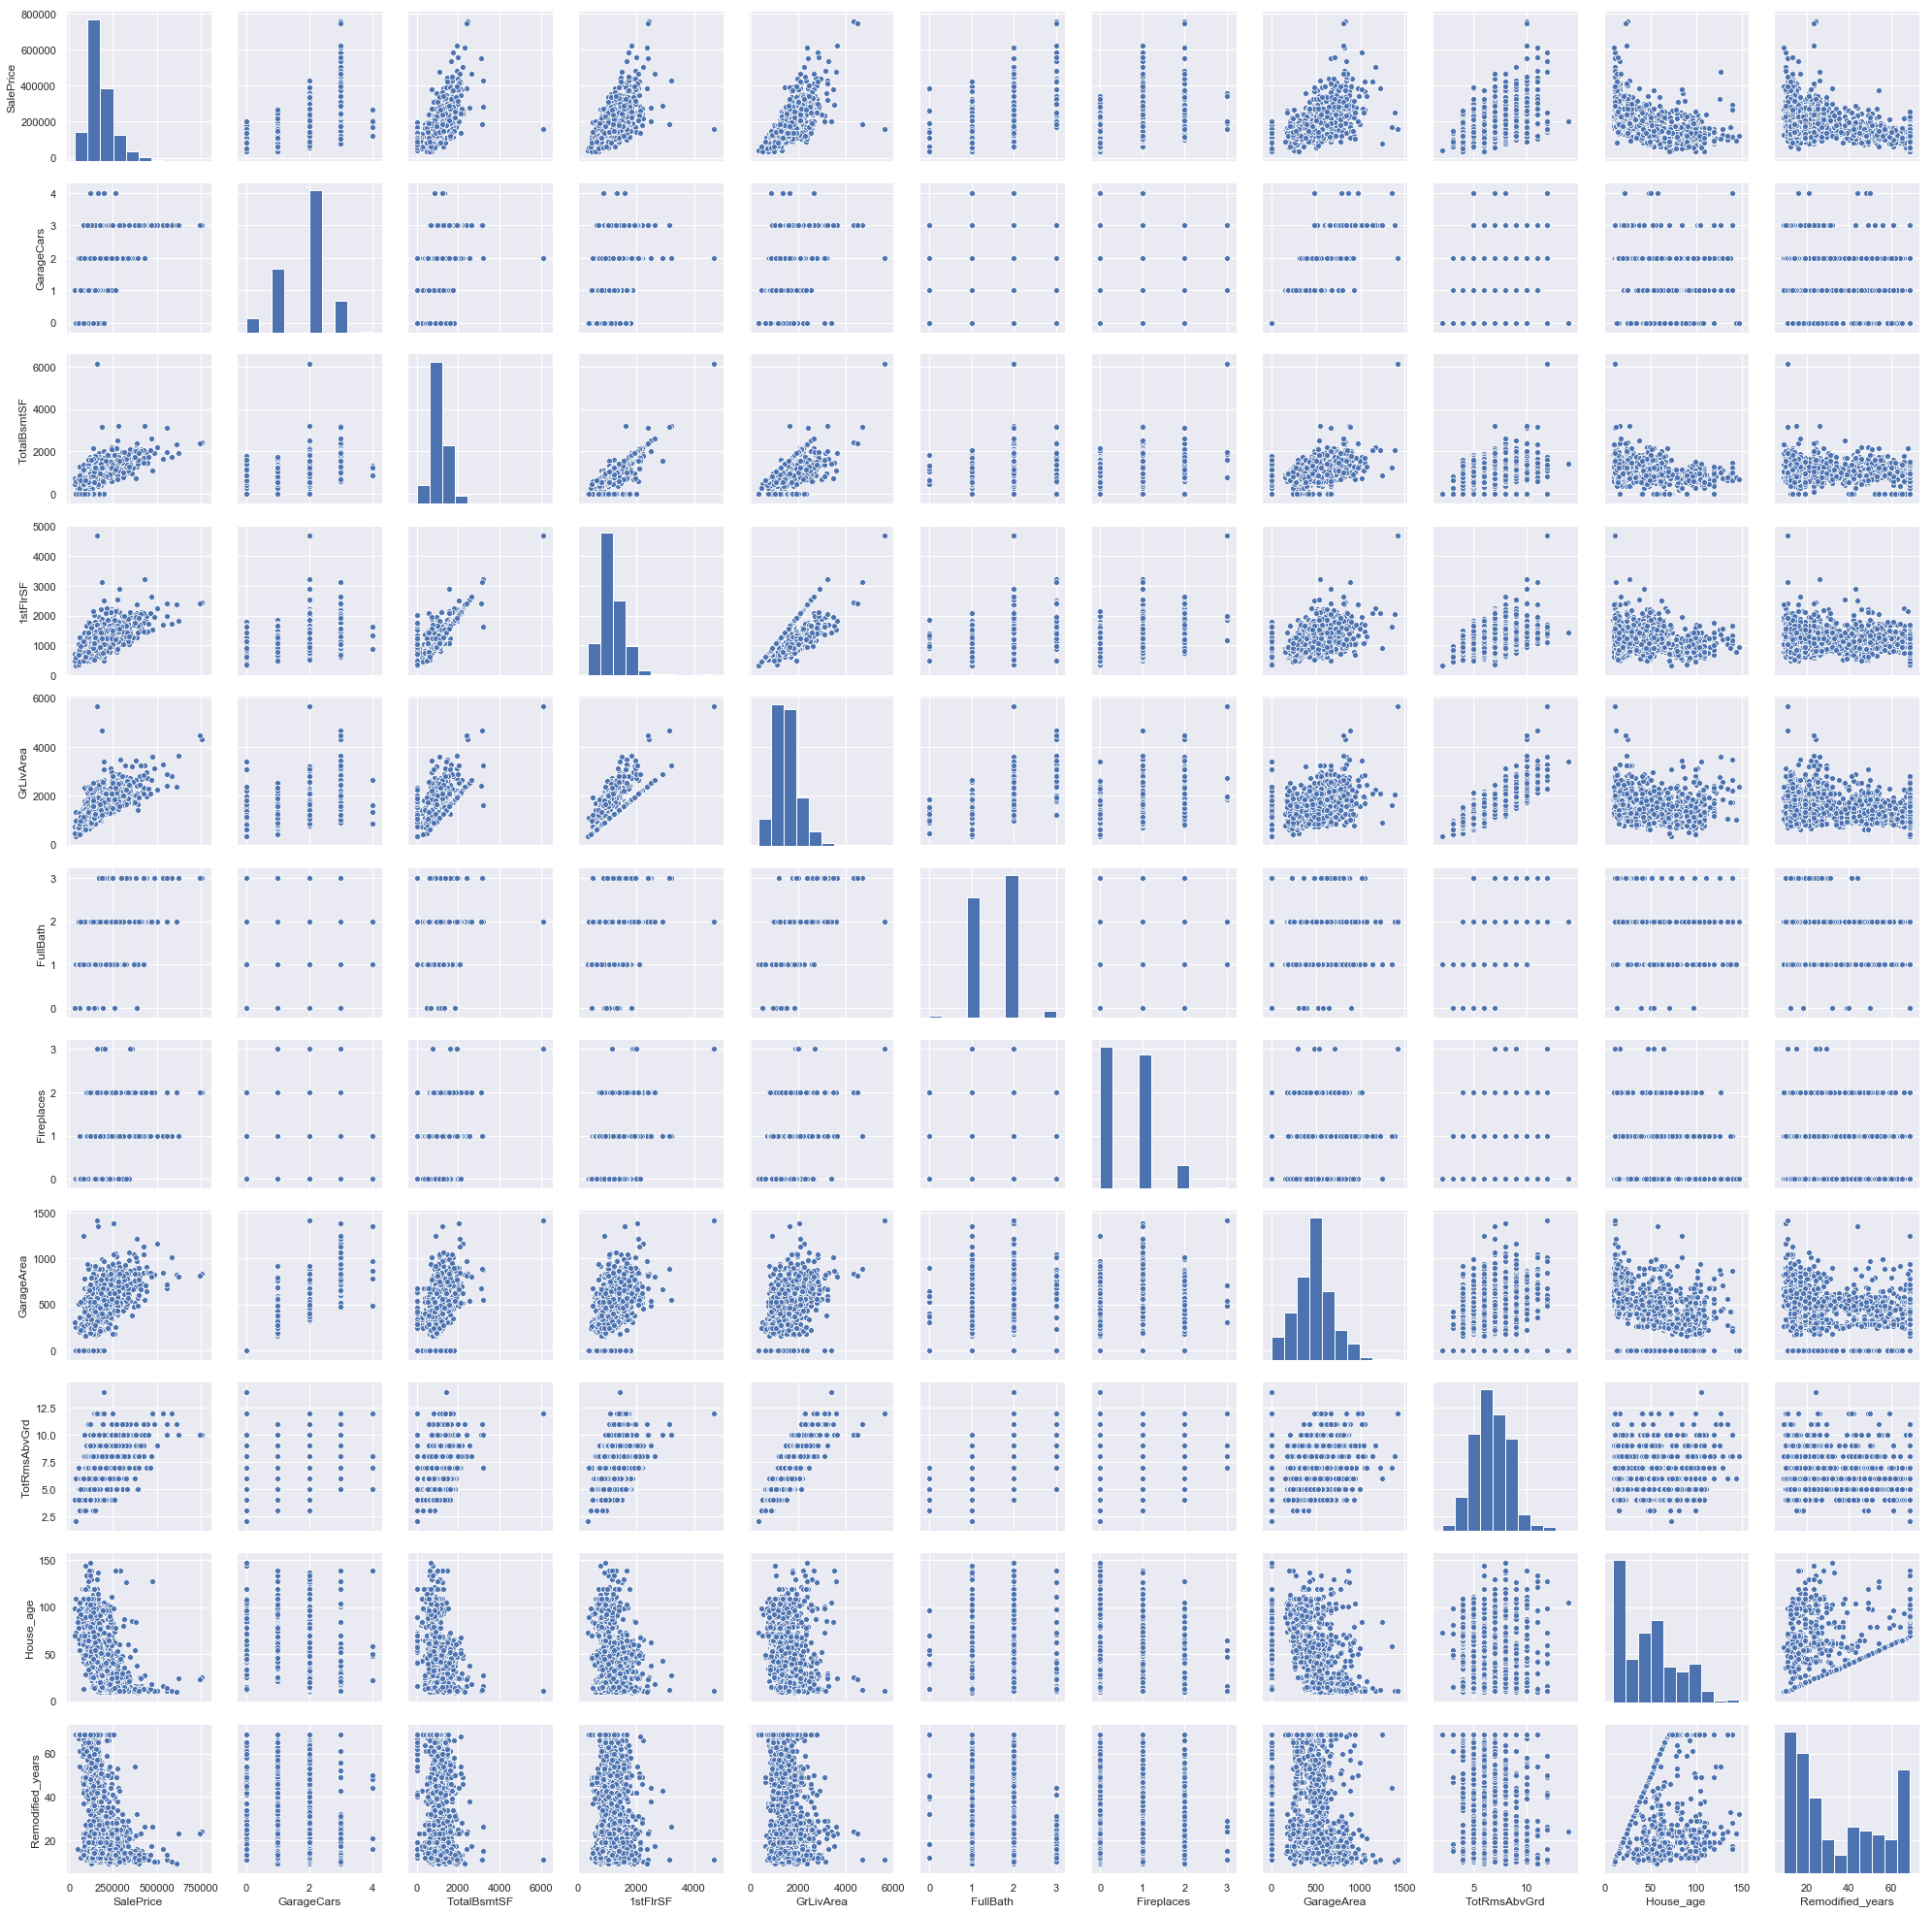

In [29]:
sns.pairplot(housing,vars=["SalePrice","GarageCars",'TotalBsmtSF',  '1stFlrSF','GrLivArea','FullBath','Fireplaces','GarageArea',"TotRmsAbvGrd","House_age","Remodified_years"])

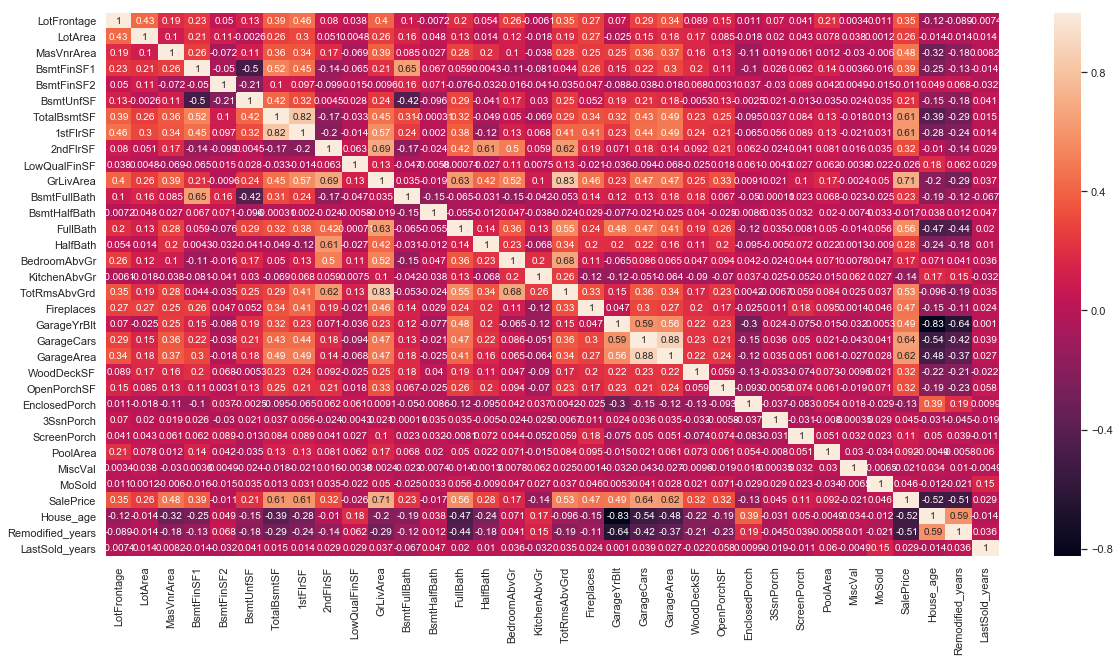

In [30]:
%matplotlib inline
plt.figure(figsize = (20,10))
sns.heatmap(housing.iloc[:,1:].corr(),annot = True)

In [31]:
# Top Correlations of explanatory variables
cor=housing.loc[:,(housing.columns !="Id") & (housing.columns !="SalePrice") ].corr().abs().unstack()
cornot1 = cor[cor!=1]
cornot1.sort_values(ascending=False).drop_duplicates().head(20)

GarageArea        GarageCars      0.882475
House_age         GarageYrBlt     0.825667
TotRmsAbvGrd      GrLivArea       0.825489
TotalBsmtSF       1stFlrSF        0.819530
GrLivArea         2ndFlrSF        0.687501
TotRmsAbvGrd      BedroomAbvGr    0.676620
BsmtFinSF1        BsmtFullBath    0.649212
Remodified_years  GarageYrBlt     0.642277
FullBath          GrLivArea       0.630012
2ndFlrSF          TotRmsAbvGrd    0.616423
HalfBath          2ndFlrSF        0.609707
Remodified_years  House_age       0.592855
GarageCars        GarageYrBlt     0.588920
1stFlrSF          GrLivArea       0.566024
GarageArea        GarageYrBlt     0.564567
TotRmsAbvGrd      FullBath        0.554784
GarageCars        House_age       0.537850
BsmtFinSF1        TotalBsmtSF     0.522396
BedroomAbvGr      GrLivArea       0.521270
                  2ndFlrSF        0.502901
dtype: float64

#### One of these variables out of each correlated pair of explanatory variables can be dropped looking at the high correlation

#####  Drop

In [32]:
# dropping all those variables we discussed above that can be dropped due to no variance and others due to high multicollinearity
housing=housing.drop(["GarageCars","GarageYrBlt","TotRmsAbvGrd","TotalBsmtSF","2ndFlrSF","BedroomAbvGr",
                      'BsmtFinSF1',"Street","LandContour","Utilities","LandSlope","Condition2","RoofMatl","BsmtCond",
                      "Heating","CentralAir","Functional","LowQualFinSF", "BsmtHalfBath","KitchenAbvGr",
                      "PoolArea","MiscVal","3SsnPorch","ScreenPorch","EnclosedPorch","BsmtFinSF2"],axis=1)

In [33]:
SalePricecorr=housing.corr().SalePrice.sort_values(ascending=False).head(15)
cSalePricecorr

SalePrice       1.000000
GrLivArea       0.708624
GarageArea      0.623431
1stFlrSF        0.605852
FullBath        0.560664
MasVnrArea      0.477493
Fireplaces      0.466929
LotFrontage     0.351799
WoodDeckSF      0.324413
OpenPorchSF     0.315856
HalfBath        0.284108
LotArea         0.263843
BsmtFullBath    0.227122
BsmtUnfSF       0.214479
MoSold          0.046432
Name: SalePrice, dtype: float64

In [34]:
#data desciption to know what all the features represent
dd=pd.read_excel("Housing_dd.xlsx")
dd.dropna(how='all',inplace=True)
#dd

In [35]:
# updated features
numdata=housing[list(housing.select_dtypes(numerics).columns)]
catdata=housing[list(housing.select_dtypes(exclude=numerics).columns)]


In [36]:
# value counts of each category of categorical features
@interact
def catcount(col=catdata.iloc[:,1:]):
    cat_count = housing[col].value_counts()
    return sns.barplot(cat_count.index, cat_count.values)

interactive(children=(Dropdown(description='col', options=('MSZoning', 'LotShape', 'LotConfig', 'Neighborhood'…

In [37]:
@interact
def scatterplot(x=numdata.iloc[:,1:],y=numdata.iloc[:,2:]):
    return sns.lmplot( x=x, y=y, data=housing, fit_reg=False, legend=False)

interactive(children=(Dropdown(description='x', options=('LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtUnfSF', …

In [38]:
# density of numerical feature value
@interact
def density( y=numdata.iloc[:,1:].columns,tick_spacing = [5000,50,100]):
    ax=housing[y].plot(kind="hist",title=y,bins=50, rot=30,figsize=[10,6])
    ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
    return

interactive(children=(Dropdown(description='y', options=('LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtUnfSF', …

In [39]:
@interact
def outliers_check( y=numdata.iloc[:,1:].columns):
    return housing.plot(kind='box',y=y,figsize=[6,5]) 

interactive(children=(Dropdown(description='y', options=('LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtUnfSF', …

### Removing outliers:

##### Lot Area 

In [40]:
# from the density plot and boxplot we can see that  LotArea>30000 has very few houses
(housing["LotArea"]>30000).sum()

22

In [41]:
housing=housing[housing["LotArea"]<30000]

##### LotFrontage

In [42]:
(housing["LotFrontage"]>=160).sum()

6

In [43]:
housing=housing.drop((housing[housing["LotFrontage"]>=160]).index)

#### Fireplaces

In [44]:
# houses with fireplaces more than 2 are very rare , should be dropped as these are outliers
(housing["Fireplaces"]>2).sum()

4

In [45]:
housing=housing.drop((housing[housing["Fireplaces"]>2]).index)

#### GarageArea

In [46]:
(housing["GarageArea"]>1000).sum()

13

In [47]:
housing=housing[housing["GarageArea"]<1000]

#### SalePrice

In [48]:
(housing["SalePrice"]>=450000).sum()

9

In [49]:
housing=housing[housing["SalePrice"]<450000]

#### House_age

In [50]:
(housing["House_age"]>=130).sum()

9

In [51]:
housing=housing[housing["House_age"]<130]

In [52]:
missing_coldata(housing)[missing_coldata(housing)["% of missing value"]>0]

,% of missing value,Count of Missing Values
LotFrontage,17.6,246
GarageType,5.7,79
GarageCond,5.7,79
GarageFinish,5.7,79
GarageQual,5.7,79
BsmtExposure,2.7,38
BsmtFinType2,2.7,38
BsmtQual,2.6,37
BsmtFinType1,2.6,37
MasVnrArea,0.4,6


##### LotFrontage missing value imputation

In [53]:
housing.LotFrontage.fillna((housing.LotFrontage.mean()),inplace=True)

In [54]:
housing.LotFrontage.isnull().sum()

0

In [55]:
#drop rows with remaining missing values

In [56]:
housing.dropna(inplace=True)

In [57]:
housing.shape

(1279, 50)

In [58]:
missing_coldata(housing)

,% of missing value,Count of Missing Values
LastSold_years,0.0,0
OverallCond,0.0,0
BsmtExposure,0.0,0
BsmtQual,0.0,0
Foundation,0.0,0
ExterCond,0.0,0
ExterQual,0.0,0
MasVnrArea,0.0,0
MasVnrType,0.0,0
Exterior2nd,0.0,0


In [59]:
#keeping a copy of the original dataset after cleaning
housingcopy=housing.copy(deep=True)

### Data Preparation


In [60]:
numdata=housing[list(housing.select_dtypes(numerics).columns)]
# CATEGORICAL 
catdata=housing[list(housing.select_dtypes(exclude=numerics).columns)]

In [61]:
# # Get the dummy variables for the categorical features and store them in a new variable - 'status'

status = pd.get_dummies(catdata)

# Check what the dataset 'status' looks like
status.head()

,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,...,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [62]:
# Let's drop the first column from status df using 'drop_first = True'
status = pd.get_dummies(catdata, drop_first = True)

# Add the results to the original housing dataframe
housing = pd.concat([housing, status], axis = 1)

# Now let's see the head of our dataframe.
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtUnfSF,HeatingQC,Electrical,1stFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,KitchenQual,Fireplaces,GarageType,GarageFinish,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,MoSold,SaleType,SaleCondition,SalePrice,House_age,Remodified_years,LastSold_years,...,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,Norm,1Fam,2Story,7,5,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,No,GLQ,Unf,150,Ex,SBrkr,856,1710,1,2,1,Gd,0,Attchd,RFn,548,TA,TA,Y,0,61,2,WD,Normal,208500,16,16,11,...,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,Feedr,1Fam,1Story,6,8,Gable,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,Gd,ALQ,Unf,284,Ex,SBrkr,1262,1262,0,2,0,TA,1,Attchd,RFn,460,TA,TA,Y,298,0,5,WD,Normal,181500,43,43,12,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,Norm,1Fam,2Story,7,5,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,Mn,GLQ,Unf,434,Ex,SBrkr,920,1786,1,2,1,Gd,1,Attchd,RFn,608,TA,TA,Y,0,42,9,WD,Normal,223500,18,17,11,...,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,Norm,1Fam,2Story,7,5,Gable,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,No,ALQ,Unf,540,Gd,SBrkr,961,1717,1,1,0,Gd,1,Detchd,Unf,642,TA,TA,Y,0,35,2,WD,Abnorml,140000,104,49,13,...,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,Norm,1Fam,2Story,8,5,Gable,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,Av,GLQ,Unf,490,Ex,SBrkr,1145,2198,1,2,1,Gd,1,Attchd,RFn,836,TA,TA,Y,192,84,12,WD,Normal,250000,19,19,11,...,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0


In [63]:
# Drop catdata columns we have created the dummies for it
housing.drop(catdata.columns, axis = 1, inplace = True)

housing.head()

,Id,LotFrontage,LotArea,MasVnrArea,BsmtUnfSF,1stFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,SalePrice,House_age,Remodified_years,LastSold_years,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,...,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,65.0,8450,196.0,150,856,1710,1,2,1,0,548,0,61,2,208500,16,16,11,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,2,80.0,9600,0.0,284,1262,1262,0,2,0,1,460,298,0,5,181500,43,43,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
2,3,68.0,11250,162.0,434,920,1786,1,2,1,1,608,0,42,9,223500,18,17,11,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
3,4,60.0,9550,0.0,540,961,1717,1,1,0,1,642,0,35,2,140000,104,49,13,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
4,5,84.0,14260,350.0,490,1145,2198,1,2,1,1,836,192,84,12,250000,19,19,11,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0


## Splitting the Data into Training and Testing Sets

In [64]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively

df_train, df_test = train_test_split(housing, train_size = 0.7, test_size = 0.3, random_state = 100)

### Rescaling the Features 

We will use MinMax scaling.

In [65]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [66]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars=numdata.iloc[:,1:].columns
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train.head()

C:\Users\shrey\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,Id,LotFrontage,LotArea,MasVnrArea,BsmtUnfSF,1stFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,SalePrice,House_age,Remodified_years,LastSold_years,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,...,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1091,1092,0.022901,0.023980,0.190135,0.038527,0.066667,0.291756,0.5,0.666667,0.5,0.0,0.366950,0.000000,0.087751,0.181818,0.308111,0.091667,0.166667,0.50,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
341,342,0.297710,0.243066,0.000000,0.308647,0.144444,0.144444,0.0,0.333333,0.0,0.0,0.162819,0.339674,0.000000,0.727273,0.115370,0.500000,1.000000,0.25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1223,1224,0.519084,0.323116,0.039462,0.590753,0.608602,0.608602,0.0,0.666667,0.0,0.0,0.447145,0.000000,0.054845,0.818182,0.253501,0.491667,0.983333,1.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
783,784,0.363395,0.267678,0.093274,0.000000,0.240860,0.240860,0.5,0.333333,0.0,0.5,0.537060,0.411685,0.054845,0.545455,0.321701,0.266667,0.533333,0.25,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
796,797,0.381679,0.235938,0.132735,0.282534,0.303584,0.303584,0.0,0.333333,0.5,0.5,0.447145,0.187500,0.000000,0.272727,0.267339,0.275000,0.550000,0.75,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0


### Dividing into X and Y sets for the model building

In [67]:
X_train =df_train.drop(["Id","SalePrice"],axis=1) #Making X two dimensional
y_train = df_train.SalePrice



#### Before we do regularised regression , we build a linear regression model without regularisation
this step is not necessary but just to see the results of model and comparing them after regularisation



### RFE
Recursive feature elimination

In [68]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [69]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 23)             # running RFE
rfe = rfe.fit(X_train, y_train)

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

In [70]:
col = X_train.columns[rfe.support_]
col

Index(['LotArea', '1stFlrSF', 'GrLivArea', 'BsmtFullBath', 'House_age',
       'MSSubClass_90', 'Neighborhood_Crawfor', 'Neighborhood_Veenker',
       'Condition1_RRAe', 'OverallQual_8', 'OverallQual_9', 'OverallQual_10',
       'OverallCond_2', 'OverallCond_3', 'OverallCond_4', 'RoofStyle_Gable',
       'RoofStyle_Gambrel', 'RoofStyle_Hip', 'RoofStyle_Mansard',
       'Exterior1st_BrkComm', 'Exterior1st_CemntBd', 'Exterior1st_Stone',
       'Exterior2nd_CmentBd'],
      dtype='object')

In [71]:
X_train.columns[~rfe.support_]

Index(['LotFrontage', 'MasVnrArea', 'BsmtUnfSF', 'FullBath', 'HalfBath',
       'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'MoSold',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=182)

### Building model using statsmodel, for the detailed statistics

In [72]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     253.4
Date:                Thu, 26 Sep 2019   Prob (F-statistic):               0.00
Time:                        00:07:04   Log-Likelihood:                 1246.3
No. Observations:                 895   AIC:                            -2445.
Df Residuals:                     871   BIC:                            -2330.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0062 

In [73]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor
X_train_rfe= X_train_rfe.drop(['const'], axis=1)
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
22,Exterior2nd_CmentBd,38.73
20,Exterior1st_CemntBd,38.39
15,RoofStyle_Gable,10.37
2,GrLivArea,9.72
1,1stFlrSF,8.55
0,LotArea,7.39
17,RoofStyle_Hip,4.19
4,House_age,3.70
3,BsmtFullBath,1.90
9,OverallQual_8,1.57


In [74]:
X_train_new = X_train_rfe.drop(["Exterior1st_BrkComm"], axis = 1)
X_train_lm = sm.add_constant(X_train_new)
   # Running the linear model

lm = sm.OLS(y_train,X_train_lm).fit()
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     264.3
Date:                Thu, 26 Sep 2019   Prob (F-statistic):               0.00
Time:                        00:07:05   Log-Likelihood:                 1245.0
No. Observations:                 895   AIC:                            -2444.
Df Residuals:                     872   BIC:                            -2334.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0060 

In [75]:
#VIF
X_train_new = X_train_lm.drop(['const'], axis=1)
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
21,Exterior2nd_CmentBd,38.73
19,Exterior1st_CemntBd,38.39
15,RoofStyle_Gable,10.37
2,GrLivArea,9.72
1,1stFlrSF,8.54
0,LotArea,7.39
17,RoofStyle_Hip,4.19
4,House_age,3.70
3,BsmtFullBath,1.90
9,OverallQual_8,1.57


In [76]:
X_train_new = X_train_new.drop(["Exterior2nd_CmentBd"], axis = 1)
# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     276.1
Date:                Thu, 26 Sep 2019   Prob (F-statistic):               0.00
Time:                        00:07:05   Log-Likelihood:                 1243.5
No. Observations:                 895   AIC:                            -2443.
Df Residuals:                     873   BIC:                            -2337.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0059      0.038      0.157      0.875      -0.068       0.080
LotArea                  0.1340      0.018      7.459      0.000       0.099       0.169
1stFlrSF                 0.1764      0.021      8.535      0.000       0.136       0.217
GrLivArea                0.4126      0.015     26.636      0.000       0.382       0.443
BsmtFullBath             0.0590      0.008      7.047      0.000       0.043       0.075
House_age               -0.2076      0.010    -20.043      0.000      -0.228      -0.187
MSSubClass_90           -0.0988      0.014     -7.118      0.000      -0.126      -0.072
Neighborhood_Crawfor     0.0911      0.011      8.197      0.000       0.069       0.113
Neighborhood_Veenker     0.0834      0.028      3.021      0.003       0.029       0.138
Condition1_RRAe         -0.0804      0.025     -3.187      0.001      -0.130      -0.031
OverallQual_8            0.1062      0.007     14.552      0.000       0.092       0.121
OverallQual_9            0.2019      0.014     14.736      0.000       0.175       0.229
OverallQual_10           0.2727      0.028      9.642      0.000       0.217       0.328
OverallCond_2            0.1535      0.062      2.460      0.014       0.031       0.276
OverallCond_3           -0.1221      0.018     -6.810      0.000      -0.157      -0.087
OverallCond_4           -0.0696      0.012     -5.915      0.000      -0.093      -0.046
RoofStyle_Gable          0.1454      0.036      4.031      0.000       0.075       0.216
RoofStyle_Gambrel        0.1579      0.042      3.804      0.000       0.076       0.239
RoofStyle_Hip            0.1506      0.036      4.154      0.000       0.079       0.222
RoofStyle_Mansard        0.1033      0.050      2.055      0.040       0.005       0.202
Exterior1st_CemntBd      0.0191      0.011      1.746      0.081      -0.002       0.041
Exterior1st_Stone       -0.1968      0.062     -3.163      0.002      -0.319      -0.075
==============================================================================
Omnibus:                      159.272   Durbin-Watson:                   1.857
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              703.153
Skew:                           0.755   Prob(JB):                    2.05e-153
Kurtosis:                       7.071   Cond. No.                         59.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [77]:


vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
15,RoofStyle_Gable,10.36
2,GrLivArea,9.72
1,1stFlrSF,8.53
0,LotArea,7.39
17,RoofStyle_Hip,4.19
4,House_age,3.70
3,BsmtFullBath,1.90
9,OverallQual_8,1.57
10,OverallQual_9,1.31
16,RoofStyle_Gambrel,1.21


In [78]:
X_train_new = X_train_new.drop(["Exterior1st_CemntBd"], axis = 1)
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     289.0
Date:                Thu, 26 Sep 2019   Prob (F-statistic):               0.00
Time:                        00:07:05   Log-Likelihood:                 1241.9
No. Observations:                 895   AIC:                            -2442.
Df Residuals:                     874   BIC:                            -2341.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0081      0.038      0.214      0.830      -0.066       0.082
LotArea                  0.1294      0.018      7.274      0.000       0.094       0.164
1stFlrSF                 0.1771      0.021      8.561      0.000       0.137       0.218
GrLivArea                0.4131      0.016     26.643      0.000       0.383       0.444
BsmtFullBath             0.0597      0.008      7.134      0.000       0.043       0.076
House_age               -0.2089      0.010    -20.191      0.000      -0.229      -0.189
MSSubClass_90           -0.0997      0.014     -7.178      0.000      -0.127      -0.072
Neighborhood_Crawfor     0.0934      0.011      8.457      0.000       0.072       0.115
Neighborhood_Veenker     0.0826      0.028      2.988      0.003       0.028       0.137
Condition1_RRAe         -0.0803      0.025     -3.179      0.002      -0.130      -0.031
OverallQual_8            0.1072      0.007     14.723      0.000       0.093       0.122
OverallQual_9            0.2054      0.014     15.135      0.000       0.179       0.232
OverallQual_10           0.2798      0.028      9.986      0.000       0.225       0.335
OverallCond_2            0.1493      0.062      2.393      0.017       0.027       0.272
OverallCond_3           -0.1206      0.018     -6.726      0.000      -0.156      -0.085
OverallCond_4           -0.0676      0.012     -5.766      0.000      -0.091      -0.045
RoofStyle_Gable          0.1448      0.036      4.009      0.000       0.074       0.216
RoofStyle_Gambrel        0.1567      0.042      3.769      0.000       0.075       0.238
RoofStyle_Hip            0.1497      0.036      4.124      0.000       0.078       0.221
RoofStyle_Mansard        0.1026      0.050      2.039      0.042       0.004       0.201
Exterior1st_Stone       -0.1979      0.062     -3.177      0.002      -0.320      -0.076
==============================================================================
Omnibus:                      160.253   Durbin-Watson:                   1.858
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              698.406
Skew:                           0.765   Prob(JB):                    2.20e-152
Kurtosis:                       7.048   Cond. No.                         59.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [79]:

#X_train_lm = X_train_lm.drop(['const'], axis=1)
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
15,RoofStyle_Gable,10.24
2,GrLivArea,9.71
1,1stFlrSF,8.53
0,LotArea,7.24
17,RoofStyle_Hip,4.17
4,House_age,3.68
3,BsmtFullBath,1.89
9,OverallQual_8,1.56
10,OverallQual_9,1.28
16,RoofStyle_Gambrel,1.21


In [80]:
X_train_new = X_train_new.drop(["RoofStyle_Gable"], axis = 1)
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     298.3
Date:                Thu, 26 Sep 2019   Prob (F-statistic):               0.00
Time:                        00:07:05   Log-Likelihood:                 1233.7
No. Observations:                 895   AIC:                            -2427.
Df Residuals:                     875   BIC:                            -2332.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.1565      0.008     20.015      0.000       0.141       0.172
LotArea                  0.1231      0.018      6.889      0.000       0.088       0.158
1stFlrSF                 0.1748      0.021      8.378      0.000       0.134       0.216
GrLivArea                0.4093      0.016     26.223      0.000       0.379       0.440
BsmtFullBath             0.0604      0.008      7.155      0.000       0.044       0.077
House_age               -0.2109      0.010    -20.232      0.000      -0.231      -0.190
MSSubClass_90           -0.1060      0.014     -7.612      0.000      -0.133      -0.079
Neighborhood_Crawfor     0.0953      0.011      8.557      0.000       0.073       0.117
Neighborhood_Veenker     0.0838      0.028      3.009      0.003       0.029       0.139
Condition1_RRAe         -0.0780      0.025     -3.063      0.002      -0.128      -0.028
OverallQual_8            0.1066      0.007     14.517      0.000       0.092       0.121
OverallQual_9            0.2065      0.014     15.094      0.000       0.180       0.233
OverallQual_10           0.2812      0.028      9.950      0.000       0.226       0.337
OverallCond_2            0.1486      0.063      2.361      0.018       0.025       0.272
OverallCond_3           -0.1198      0.018     -6.624      0.000      -0.155      -0.084
OverallCond_4           -0.0661      0.012     -5.597      0.000      -0.089      -0.043
RoofStyle_Gambrel        0.0126      0.021      0.598      0.550      -0.029       0.054
RoofStyle_Hip            0.0058      0.006      1.055      0.292      -0.005       0.017
RoofStyle_Mansard       -0.0397      0.036     -1.104      0.270      -0.110       0.031
Exterior1st_Stone       -0.1931      0.063     -3.074      0.002      -0.316      -0.070
==============================================================================
Omnibus:                      154.557   Durbin-Watson:                   1.863
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              749.868
Skew:                           0.701   Prob(JB):                    1.47e-163
Kurtosis:                       7.260   Cond. No.                         37.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [81]:

#X_train_lm = X_train_lm.drop(['const'], axis=1)
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,GrLivArea,8.05
1,1stFlrSF,8.02
0,LotArea,6.83
4,House_age,2.59
3,BsmtFullBath,1.78
9,OverallQual_8,1.56
16,RoofStyle_Hip,1.47
10,OverallQual_9,1.28
6,Neighborhood_Crawfor,1.12
14,OverallCond_4,1.10


In [82]:
X_train_new = X_train_new.drop(["RoofStyle_Gambrel"], axis = 1)
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     315.1
Date:                Thu, 26 Sep 2019   Prob (F-statistic):               0.00
Time:                        00:07:05   Log-Likelihood:                 1233.6
No. Observations:                 895   AIC:                            -2429.
Df Residuals:                     876   BIC:                            -2338.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.1564      0.008     20.014      0.000       0.141       0.172
LotArea                  0.1230      0.018      6.885      0.000       0.088       0.158
1stFlrSF                 0.1742      0.021      8.362      0.000       0.133       0.215
GrLivArea                0.4100      0.016     26.344      0.000       0.379       0.441
BsmtFullBath             0.0604      0.008      7.154      0.000       0.044       0.077
House_age               -0.2101      0.010    -20.328      0.000      -0.230      -0.190
MSSubClass_90           -0.1061      0.014     -7.629      0.000      -0.133      -0.079
Neighborhood_Crawfor     0.0957      0.011      8.610      0.000       0.074       0.117
Neighborhood_Veenker     0.0838      0.028      3.010      0.003       0.029       0.139
Condition1_RRAe         -0.0780      0.025     -3.067      0.002      -0.128      -0.028
OverallQual_8            0.1067      0.007     14.532      0.000       0.092       0.121
OverallQual_9            0.2067      0.014     15.117      0.000       0.180       0.234
OverallQual_10           0.2814      0.028      9.960      0.000       0.226       0.337
OverallCond_2            0.1487      0.063      2.364      0.018       0.025       0.272
OverallCond_3           -0.1200      0.018     -6.641      0.000      -0.155      -0.085
OverallCond_4           -0.0660      0.012     -5.589      0.000      -0.089      -0.043
RoofStyle_Hip            0.0057      0.006      1.033      0.302      -0.005       0.017
RoofStyle_Mansard       -0.0400      0.036     -1.113      0.266      -0.111       0.031
Exterior1st_Stone       -0.1931      0.063     -3.075      0.002      -0.316      -0.070
==============================================================================
Omnibus:                      154.391   Durbin-Watson:                   1.859
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              750.140
Skew:                           0.699   Prob(JB):                    1.29e-163
Kurtosis:                       7.261   Cond. No.                         37.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [83]:

#X_train_lm = X_train_lm.drop(['const'], axis=1)
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,GrLivArea,8.01
1,1stFlrSF,7.99
0,LotArea,6.83
4,House_age,2.54
3,BsmtFullBath,1.78
9,OverallQual_8,1.56
15,RoofStyle_Hip,1.46
10,OverallQual_9,1.27
6,Neighborhood_Crawfor,1.11
14,OverallCond_4,1.10


In [84]:
X_train_new = X_train_new.drop(["RoofStyle_Hip"], axis = 1)
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     333.5
Date:                Thu, 26 Sep 2019   Prob (F-statistic):               0.00
Time:                        00:07:05   Log-Likelihood:                 1233.0
No. Observations:                 895   AIC:                            -2430.
Df Residuals:                     877   BIC:                            -2344.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.1562      0.008     19.999      0.000       0.141       0.172
LotArea                  0.1237      0.018      6.927      0.000       0.089       0.159
1stFlrSF                 0.1788      0.020      8.790      0.000       0.139       0.219
GrLivArea                0.4086      0.016     26.357      0.000       0.378       0.439
BsmtFullBath             0.0606      0.008      7.187      0.000       0.044       0.077
House_age               -0.2093      0.010    -20.306      0.000      -0.230      -0.189
MSSubClass_90           -0.1069      0.014     -7.698      0.000      -0.134      -0.080
Neighborhood_Crawfor     0.0958      0.011      8.618      0.000       0.074       0.118
Neighborhood_Veenker     0.0831      0.028      2.985      0.003       0.028       0.138
Condition1_RRAe         -0.0793      0.025     -3.118      0.002      -0.129      -0.029
OverallQual_8            0.1075      0.007     14.721      0.000       0.093       0.122
OverallQual_9            0.2093      0.013     15.568      0.000       0.183       0.236
OverallQual_10           0.2832      0.028     10.043      0.000       0.228       0.338
OverallCond_2            0.1500      0.063      2.384      0.017       0.027       0.273
OverallCond_3           -0.1198      0.018     -6.630      0.000      -0.155      -0.084
OverallCond_4           -0.0657      0.012     -5.564      0.000      -0.089      -0.043
RoofStyle_Mansard       -0.0410      0.036     -1.140      0.255      -0.112       0.030
Exterior1st_Stone       -0.1915      0.063     -3.051      0.002      -0.315      -0.068
==============================================================================
Omnibus:                      153.577   Durbin-Watson:                   1.860
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              746.166
Skew:                           0.695   Prob(JB):                    9.38e-163
Kurtosis:                       7.252   Cond. No.                         37.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [85]:

#X_train_lm = X_train_lm.drop(['const'], axis=1)
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,GrLivArea,7.92
1,1stFlrSF,7.61
0,LotArea,6.82
4,House_age,2.53
3,BsmtFullBath,1.78
9,OverallQual_8,1.54
10,OverallQual_9,1.23
6,Neighborhood_Crawfor,1.11
14,OverallCond_4,1.10
5,MSSubClass_90,1.06


In [86]:
X_train_new = X_train_new.drop(["RoofStyle_Mansard"], axis = 1)
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     354.1
Date:                Thu, 26 Sep 2019   Prob (F-statistic):               0.00
Time:                        00:07:05   Log-Likelihood:                 1232.3
No. Observations:                 895   AIC:                            -2431.
Df Residuals:                     878   BIC:                            -2349.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.1567      0.008     20.079      0.000       0.141       0.172
LotArea                  0.1238      0.018      6.933      0.000       0.089       0.159
1stFlrSF                 0.1783      0.020      8.765      0.000       0.138       0.218
GrLivArea                0.4069      0.015     26.362      0.000       0.377       0.437
BsmtFullBath             0.0610      0.008      7.243      0.000       0.045       0.078
House_age               -0.2095      0.010    -20.323      0.000      -0.230      -0.189
MSSubClass_90           -0.1067      0.014     -7.679      0.000      -0.134      -0.079
Neighborhood_Crawfor     0.0961      0.011      8.650      0.000       0.074       0.118
Neighborhood_Veenker     0.0832      0.028      2.987      0.003       0.029       0.138
Condition1_RRAe         -0.0791      0.025     -3.111      0.002      -0.129      -0.029
OverallQual_8            0.1079      0.007     14.801      0.000       0.094       0.122
OverallQual_9            0.2098      0.013     15.616      0.000       0.183       0.236
OverallQual_10           0.2837      0.028     10.064      0.000       0.228       0.339
OverallCond_2            0.1498      0.063      2.382      0.017       0.026       0.273
OverallCond_3           -0.1196      0.018     -6.615      0.000      -0.155      -0.084
OverallCond_4           -0.0654      0.012     -5.543      0.000      -0.089      -0.042
Exterior1st_Stone       -0.1907      0.063     -3.038      0.002      -0.314      -0.067
==============================================================================
Omnibus:                      153.977   Durbin-Watson:                   1.861
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              739.973
Skew:                           0.701   Prob(JB):                    2.07e-161
Kurtosis:                       7.228   Cond. No.                         37.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [87]:

#X_train_lm = X_train_lm.drop(['const'], axis=1)
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,GrLivArea,7.87
1,1stFlrSF,7.61
0,LotArea,6.82
4,House_age,2.53
3,BsmtFullBath,1.77
9,OverallQual_8,1.54
10,OverallQual_9,1.23
6,Neighborhood_Crawfor,1.11
14,OverallCond_4,1.09
5,MSSubClass_90,1.06


In [88]:
X_train_new = X_train_new.drop(["LotArea"], axis = 1)
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     355.5
Date:                Thu, 26 Sep 2019   Prob (F-statistic):               0.00
Time:                        00:07:06   Log-Likelihood:                 1208.5
No. Observations:                 895   AIC:                            -2385.
Df Residuals:                     879   BIC:                            -2308.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.1708      0.008     22.088      0.000       0.156       0.186
1stFlrSF                 0.2129      0.020     10.517      0.000       0.173       0.253
GrLivArea                0.4361      0.015     28.617      0.000       0.406       0.466
BsmtFullBath             0.0620      0.009      7.166      0.000       0.045       0.079
House_age               -0.2056      0.011    -19.462      0.000      -0.226      -0.185
MSSubClass_90           -0.1080      0.014     -7.575      0.000      -0.136      -0.080
Neighborhood_Crawfor     0.0979      0.011      8.585      0.000       0.075       0.120
Neighborhood_Veenker     0.0884      0.029      3.094      0.002       0.032       0.144
Condition1_RRAe         -0.0699      0.026     -2.683      0.007      -0.121      -0.019
OverallQual_8            0.1036      0.007     13.892      0.000       0.089       0.118
OverallQual_9            0.2112      0.014     15.311      0.000       0.184       0.238
OverallQual_10           0.2823      0.029      9.756      0.000       0.226       0.339
OverallCond_2            0.1446      0.065      2.240      0.025       0.018       0.271
OverallCond_3           -0.1207      0.019     -6.506      0.000      -0.157      -0.084
OverallCond_4           -0.0664      0.012     -5.481      0.000      -0.090      -0.043
Exterior1st_Stone       -0.1974      0.064     -3.063      0.002      -0.324      -0.071
==============================================================================
Omnibus:                      145.280   Durbin-Watson:                   1.867
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              638.451
Skew:                           0.682   Prob(JB):                    2.30e-139
Kurtosis:                       6.906   Cond. No.                         35.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [89]:


vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,1stFlrSF,6.75
1,GrLivArea,6.33
3,House_age,2.37
2,BsmtFullBath,1.76
8,OverallQual_8,1.53
9,OverallQual_9,1.23
5,Neighborhood_Crawfor,1.11
13,OverallCond_4,1.09
4,MSSubClass_90,1.06
10,OverallQual_10,1.04


In [90]:
SalePricecorr

SalePrice       1.000000
GrLivArea       0.708624
GarageArea      0.623431
1stFlrSF        0.605852
FullBath        0.560664
MasVnrArea      0.477493
Fireplaces      0.466929
LotFrontage     0.351799
WoodDeckSF      0.324413
OpenPorchSF     0.315856
HalfBath        0.284108
LotArea         0.263843
BsmtFullBath    0.227122
BsmtUnfSF       0.214479
MoSold          0.046432
Name: SalePrice, dtype: float64

In [91]:

#X_train_lm = X_train_lm.drop(['const'], axis=1)
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,1stFlrSF,6.75
1,GrLivArea,6.33
3,House_age,2.37
2,BsmtFullBath,1.76
8,OverallQual_8,1.53
9,OverallQual_9,1.23
5,Neighborhood_Crawfor,1.11
13,OverallCond_4,1.09
4,MSSubClass_90,1.06
10,OverallQual_10,1.04


In [92]:
X_train_new = X_train_new.drop(["1stFlrSF"], axis = 1)
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     331.7
Date:                Thu, 26 Sep 2019   Prob (F-statistic):               0.00
Time:                        00:07:06   Log-Likelihood:                 1155.5
No. Observations:                 895   AIC:                            -2281.
Df Residuals:                     880   BIC:                            -2209.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.1988      0.008     25.834      0.000       0.184       0.214
GrLivArea                0.4951      0.015     32.944      0.000       0.466       0.525
BsmtFullBath             0.0773      0.009      8.554      0.000       0.060       0.095
House_age               -0.2159      0.011    -19.353      0.000      -0.238      -0.194
MSSubClass_90           -0.0930      0.015     -6.184      0.000      -0.123      -0.064
Neighborhood_Crawfor     0.1019      0.012      8.433      0.000       0.078       0.126
Neighborhood_Veenker     0.1038      0.030      3.429      0.001       0.044       0.163
Condition1_RRAe         -0.0563      0.028     -2.040      0.042      -0.110      -0.002
OverallQual_8            0.1192      0.008     15.390      0.000       0.104       0.134
OverallQual_9            0.2432      0.014     17.052      0.000       0.215       0.271
OverallQual_10           0.3158      0.031     10.353      0.000       0.256       0.376
OverallCond_2            0.1551      0.068      2.265      0.024       0.021       0.289
OverallCond_3           -0.1099      0.020     -5.597      0.000      -0.148      -0.071
OverallCond_4           -0.0648      0.013     -5.043      0.000      -0.090      -0.040
Exterior1st_Stone       -0.1102      0.068     -1.625      0.104      -0.243       0.023
==============================================================================
Omnibus:                      149.554   Durbin-Watson:                   1.944
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              627.498
Skew:                           0.720   Prob(JB):                    5.50e-137
Kurtosis:                       6.841   Cond. No.                         35.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [93]:

#X_train_lm = X_train_lm.drop(['const'], axis=1)
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,GrLivArea,3.20
2,House_age,2.31
1,BsmtFullBath,1.62
7,OverallQual_8,1.46
8,OverallQual_9,1.17
4,Neighborhood_Crawfor,1.11
12,OverallCond_4,1.09
3,MSSubClass_90,1.06
10,OverallCond_2,1.04
9,OverallQual_10,1.03


In [94]:
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     331.7
Date:                Thu, 26 Sep 2019   Prob (F-statistic):               0.00
Time:                        00:07:06   Log-Likelihood:                 1155.5
No. Observations:                 895   AIC:                            -2281.
Df Residuals:                     880   BIC:                            -2209.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.1988      0.008     25.834      0.000       0.184       0.214
GrLivArea                0.4951      0.015     32.944      0.000       0.466       0.525
BsmtFullBath             0.0773      0.009      8.554      0.000       0.060       0.095
House_age               -0.2159      0.011    -19.353      0.000      -0.238      -0.194
MSSubClass_90           -0.0930      0.015     -6.184      0.000      -0.123      -0.064
Neighborhood_Crawfor     0.1019      0.012      8.433      0.000       0.078       0.126
Neighborhood_Veenker     0.1038      0.030      3.429      0.001       0.044       0.163
Condition1_RRAe         -0.0563      0.028     -2.040      0.042      -0.110      -0.002
OverallQual_8            0.1192      0.008     15.390      0.000       0.104       0.134
OverallQual_9            0.2432      0.014     17.052      0.000       0.215       0.271
OverallQual_10           0.3158      0.031     10.353      0.000       0.256       0.376
OverallCond_2            0.1551      0.068      2.265      0.024       0.021       0.289
OverallCond_3           -0.1099      0.020     -5.597      0.000      -0.148      -0.071
OverallCond_4           -0.0648      0.013     -5.043      0.000      -0.090      -0.040
Exterior1st_Stone       -0.1102      0.068     -1.625      0.104      -0.243       0.023
==============================================================================
Omnibus:                      149.554   Durbin-Watson:                   1.944
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              627.498
Skew:                           0.720   Prob(JB):                    5.50e-137
Kurtosis:                       6.841   Cond. No.                         35.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [95]:
X_train_new.columns

Index(['GrLivArea', 'BsmtFullBath', 'House_age', 'MSSubClass_90',
       'Neighborhood_Crawfor', 'Neighborhood_Veenker', 'Condition1_RRAe',
       'OverallQual_8', 'OverallQual_9', 'OverallQual_10', 'OverallCond_2',
       'OverallCond_3', 'OverallCond_4', 'Exterior1st_Stone'],
      dtype='object')

In [96]:
X_train_n = X_train_lm.drop(['const'], axis=1)

In [97]:
# checking if the selected variables show any correlation
cor=X_train_n.corr().abs().unstack()
cornot1 = cor[cor!=1]
cornot1.sort_values(ascending=False).drop_duplicates().head(10)

House_age      OverallQual_8           0.349214
GrLivArea      OverallQual_8           0.310277
               House_age               0.255762
House_age      Neighborhood_Crawfor    0.227192
               OverallCond_4           0.193857
OverallQual_9  OverallCond_2           0.193355
               House_age               0.191667
GrLivArea      OverallQual_9           0.177300
House_age      BsmtFullBath            0.158006
GrLivArea      Exterior1st_Stone       0.101266
dtype: float64

## Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [98]:
#Predicted Prices by the Regression model at which the company should be looking
y_train_price = lm.predict(X_train_lm)
y_train_price.head()

1091    0.362147
341     0.097614
1223    0.284051
783     0.299170
796     0.289760
dtype: float64

In [99]:
# This is the price present in the available data of the respective property
y_train.head()

1091    0.308111
341     0.115370
1223    0.253501
783     0.321701
796     0.267339
Name: SalePrice, dtype: float64

## Predicting Prices on Train data

In [156]:
dftraincopy=df_train.copy(deep=True)
dftraincopy.head()

,Id,LotFrontage,LotArea,MasVnrArea,BsmtUnfSF,1stFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,SalePrice,House_age,Remodified_years,LastSold_years,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,...,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1091,1092,0.022901,0.023980,0.190135,0.038527,0.066667,0.291756,0.5,0.666667,0.5,0.0,0.366950,0.000000,0.087751,0.181818,0.308111,0.091667,0.166667,0.50,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
341,342,0.297710,0.243066,0.000000,0.308647,0.144444,0.144444,0.0,0.333333,0.0,0.0,0.162819,0.339674,0.000000,0.727273,0.115370,0.500000,1.000000,0.25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1223,1224,0.519084,0.323116,0.039462,0.590753,0.608602,0.608602,0.0,0.666667,0.0,0.0,0.447145,0.000000,0.054845,0.818182,0.253501,0.491667,0.983333,1.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
783,784,0.363395,0.267678,0.093274,0.000000,0.240860,0.240860,0.5,0.333333,0.0,0.5,0.537060,0.411685,0.054845,0.545455,0.321701,0.266667,0.533333,0.25,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
796,797,0.381679,0.235938,0.132735,0.282534,0.303584,0.303584,0.0,0.333333,0.5,0.5,0.447145,0.187500,0.000000,0.272727,0.267339,0.275000,0.550000,0.75,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0


In [157]:
dftraincopy[num_vars]=scaler.inverse_transform(df_train[num_vars])
dftraincopy.head()

,Id,LotFrontage,LotArea,MasVnrArea,BsmtUnfSF,1stFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,SalePrice,House_age,Remodified_years,LastSold_years,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,...,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1091,1092,24.000000,2160.0,212.0,90.0,624.0,1252.0,1.0,2.0,1.0,0.0,462.0,0.0,48.0,3.0,160000.0,20.0,19.0,11.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
341,342,60.000000,8400.0,0.0,721.0,841.0,841.0,0.0,1.0,0.0,0.0,294.0,250.0,0.0,9.0,82000.0,69.0,69.0,10.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1223,1224,89.000000,10680.0,44.0,1380.0,2136.0,2136.0,0.0,2.0,0.0,0.0,528.0,0.0,30.0,10.0,137900.0,68.0,68.0,13.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
783,784,68.604692,9101.0,104.0,0.0,1110.0,1110.0,1.0,1.0,0.0,1.0,602.0,303.0,30.0,7.0,165500.0,41.0,41.0,10.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
796,797,71.000000,8197.0,148.0,660.0,1285.0,1285.0,0.0,1.0,1.0,1.0,528.0,138.0,0.0,4.0,143500.0,42.0,42.0,12.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0


In [158]:
dfpredtrain=pd.concat([df_train,y_train_price],axis=1)
dfpredtrain.shape
dfpredtrain.head()



,Id,LotFrontage,LotArea,MasVnrArea,BsmtUnfSF,1stFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,SalePrice,House_age,Remodified_years,LastSold_years,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,...,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,0
1091,1092,0.022901,0.023980,0.190135,0.038527,0.066667,0.291756,0.5,0.666667,0.5,0.0,0.366950,0.000000,0.087751,0.181818,0.308111,0.091667,0.166667,0.50,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0.362147
341,342,0.297710,0.243066,0.000000,0.308647,0.144444,0.144444,0.0,0.333333,0.0,0.0,0.162819,0.339674,0.000000,0.727273,0.115370,0.500000,1.000000,0.25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0.097614
1223,1224,0.519084,0.323116,0.039462,0.590753,0.608602,0.608602,0.0,0.666667,0.0,0.0,0.447145,0.000000,0.054845,0.818182,0.253501,0.491667,0.983333,1.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0.284051
783,784,0.363395,0.267678,0.093274,0.000000,0.240860,0.240860,0.5,0.333333,0.0,0.5,0.537060,0.411685,0.054845,0.545455,0.321701,0.266667,0.533333,0.25,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0.299170
796,797,0.381679,0.235938,0.132735,0.282534,0.303584,0.303584,0.0,0.333333,0.5,0.5,0.447145,0.187500,0.000000,0.272727,0.267339,0.275000,0.550000,0.75,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0.289760


In [159]:
dfpredtrain["SalePrice"]=dfpredtrain[0]
dfpredtrain.drop(0,inplace=True,axis=1)
dfpredtrain.head()

,Id,LotFrontage,LotArea,MasVnrArea,BsmtUnfSF,1stFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,SalePrice,House_age,Remodified_years,LastSold_years,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,...,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1091,1092,0.022901,0.023980,0.190135,0.038527,0.066667,0.291756,0.5,0.666667,0.5,0.0,0.366950,0.000000,0.087751,0.181818,0.362147,0.091667,0.166667,0.50,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
341,342,0.297710,0.243066,0.000000,0.308647,0.144444,0.144444,0.0,0.333333,0.0,0.0,0.162819,0.339674,0.000000,0.727273,0.097614,0.500000,1.000000,0.25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1223,1224,0.519084,0.323116,0.039462,0.590753,0.608602,0.608602,0.0,0.666667,0.0,0.0,0.447145,0.000000,0.054845,0.818182,0.284051,0.491667,0.983333,1.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
783,784,0.363395,0.267678,0.093274,0.000000,0.240860,0.240860,0.5,0.333333,0.0,0.5,0.537060,0.411685,0.054845,0.545455,0.299170,0.266667,0.533333,0.25,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
796,797,0.381679,0.235938,0.132735,0.282534,0.303584,0.303584,0.0,0.333333,0.5,0.5,0.447145,0.187500,0.000000,0.272727,0.289760,0.275000,0.550000,0.75,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0


In [161]:
dftraincopy1=df_train.copy(deep=True)


In [ ]:
dftraincopy1[num_vars] = scaler.inverse_transform(dfpredtrain[num_vars])



dftraincopy1.head()



In [ ]:
dftraincopy1.rename(columns={"SalePrice":'Predicted_HousePrice'}, inplace=True)


actual_predicted_train=pd.concat([dftraincopy[["Id","SalePrice"]],dftraincopy1["Predicted_HousePrice"]],axis=1)

#actual_predicted_train["Predicted_HousePrice"]=actual_predicted_train["Predicted_HousePrice"].round(0)

actual_predicted_train=actual_predicted_train.round(1)


### Exporting the data to CSV

In [183]:
export_csv = actual_predicted_train.to_csv (r'C:\Users\shrey\OneDrive\upgrap\actual_predicted_train.csv', index = None, header=True) #Don't forget to add '.csv' at the end of the path


In [100]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 0, 'Errors')

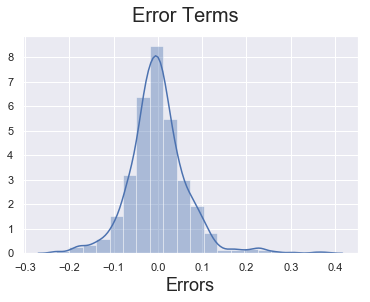

In [101]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

## Making Predictions

#### Applying the scaling on the test sets

In [102]:
df_test[num_vars] = scaler.transform(df_test[num_vars])

#### Dividing into X_test and y_test

In [103]:
X_test =df_test.drop(["Id","SalePrice"],axis=1) #Making X two dimensional
y_test = df_test.SalePrice

In [104]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)
# Making predictions
y_pred = lm.predict(X_test_new)

In [105]:
X_test_n=X_test_new.drop(['const'], axis=1)

In [106]:
# Making predictions
y_pred = lm.predict(X_test_new)

In [107]:
y_test.head()

583    0.715831
956    0.219153
294    0.325408
887    0.247570
987    0.889278
Name: SalePrice, dtype: float64

## Predicted Prices

In [108]:
y_pred.head()

583    0.718836
956    0.285220
294    0.348952
887    0.269346
987    0.745446
dtype: float64

In [107]:
y_predf=pd.DataFrame(y_pred)
y_predf.head()

,0
583,0.718836
956,0.285220
294,0.348952
887,0.269346
987,0.745446


In [135]:
dftestcopy=df_test.copy(deep=True)
dftestcopy.head()

,Id,LotFrontage,LotArea,MasVnrArea,BsmtUnfSF,1stFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,SalePrice,House_age,Remodified_years,LastSold_years,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,...,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
583,584,0.412214,0.422126,0.000000,0.529538,0.388172,0.837634,0.0,1.000000,0.5,0.5,0.874848,0.142663,0.917733,0.545455,0.715831,0.975000,0.166667,0.50,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
956,957,0.022901,-0.006214,0.000000,0.118151,0.044086,0.283513,0.0,0.333333,0.5,0.5,0.366950,0.203804,0.000000,0.363636,0.219153,0.250000,0.500000,0.25,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
294,295,0.450382,0.285198,0.213453,0.056079,0.432258,0.432258,0.5,0.333333,0.0,1.0,0.313487,0.149457,0.000000,0.818182,0.325408,0.475000,0.950000,0.25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
887,888,0.290076,0.526262,0.000000,0.349315,0.155556,0.342294,0.0,0.333333,0.5,0.0,0.170109,0.164402,0.000000,0.272727,0.247570,0.458333,0.916667,0.50,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
987,988,0.473282,0.304824,0.403587,0.121575,0.538351,0.538351,0.5,0.666667,0.5,0.5,0.541920,0.228261,0.173675,0.272727,0.889278,0.008333,0.000000,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1


In [136]:
dftestcopy[num_vars]=scaler.inverse_transform(df_test[num_vars])
dftestcopy.head()

,Id,LotFrontage,LotArea,MasVnrArea,BsmtUnfSF,1stFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,SalePrice,House_age,Remodified_years,LastSold_years,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,...,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
583,584,75.0,13500.0,0.0,1237.0,1521.0,2775.0,0.0,3.0,1.0,1.0,880.0,105.0,502.0,7.0,325000.0,126.0,19.0,11.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
956,957,24.0,1300.0,0.0,276.0,561.0,1229.0,0.0,1.0,1.0,1.0,462.0,150.0,0.0,5.0,124000.0,39.0,39.0,10.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
294,295,80.0,9600.0,238.0,131.0,1644.0,1644.0,1.0,1.0,0.0,2.0,418.0,110.0,0.0,10.0,167000.0,66.0,66.0,10.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
887,888,59.0,16466.0,0.0,816.0,872.0,1393.0,0.0,1.0,1.0,0.0,300.0,121.0,0.0,4.0,135500.0,64.0,64.0,11.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
987,988,83.0,10159.0,450.0,284.0,1940.0,1940.0,1.0,2.0,1.0,1.0,606.0,168.0,95.0,4.0,395192.0,10.0,9.0,9.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1


In [137]:
df_pred_act_test=pd.concat([df_test,y_predf],axis=1)
df_pred_act_test.shape
df_pred_act_test.head()



,Id,LotFrontage,LotArea,MasVnrArea,BsmtUnfSF,1stFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,SalePrice,House_age,Remodified_years,LastSold_years,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,...,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,0
583,584,0.412214,0.422126,0.000000,0.529538,0.388172,0.837634,0.0,1.000000,0.5,0.5,0.874848,0.142663,0.917733,0.545455,0.715831,0.975000,0.166667,0.50,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0.718836
956,957,0.022901,-0.006214,0.000000,0.118151,0.044086,0.283513,0.0,0.333333,0.5,0.5,0.366950,0.203804,0.000000,0.363636,0.219153,0.250000,0.500000,0.25,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0.285220
294,295,0.450382,0.285198,0.213453,0.056079,0.432258,0.432258,0.5,0.333333,0.0,1.0,0.313487,0.149457,0.000000,0.818182,0.325408,0.475000,0.950000,0.25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0.348952
887,888,0.290076,0.526262,0.000000,0.349315,0.155556,0.342294,0.0,0.333333,0.5,0.0,0.170109,0.164402,0.000000,0.272727,0.247570,0.458333,0.916667,0.50,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0.269346
987,988,0.473282,0.304824,0.403587,0.121575,0.538351,0.538351,0.5,0.666667,0.5,0.5,0.541920,0.228261,0.173675,0.272727,0.889278,0.008333,0.000000,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0.745446


In [139]:
df_pred_act_test["SalePrice"]=df_pred_act_test[0]
df_pred_act_test.drop(0,inplace=True,axis=1)
df_pred_act_test.head()

,Id,LotFrontage,LotArea,MasVnrArea,BsmtUnfSF,1stFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,SalePrice,House_age,Remodified_years,LastSold_years,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,...,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
583,584,0.412214,0.422126,0.000000,0.529538,0.388172,0.837634,0.0,1.000000,0.5,0.5,0.874848,0.142663,0.917733,0.545455,0.718836,0.975000,0.166667,0.50,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
956,957,0.022901,-0.006214,0.000000,0.118151,0.044086,0.283513,0.0,0.333333,0.5,0.5,0.366950,0.203804,0.000000,0.363636,0.285220,0.250000,0.500000,0.25,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
294,295,0.450382,0.285198,0.213453,0.056079,0.432258,0.432258,0.5,0.333333,0.0,1.0,0.313487,0.149457,0.000000,0.818182,0.348952,0.475000,0.950000,0.25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
887,888,0.290076,0.526262,0.000000,0.349315,0.155556,0.342294,0.0,0.333333,0.5,0.0,0.170109,0.164402,0.000000,0.272727,0.269346,0.458333,0.916667,0.50,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
987,988,0.473282,0.304824,0.403587,0.121575,0.538351,0.538351,0.5,0.666667,0.5,0.5,0.541920,0.228261,0.173675,0.272727,0.745446,0.008333,0.000000,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1


In [ ]:
dftestcopy1=df_test.copy(deep=True)
#dftestcopy1.head()

In [143]:
dftestcopy1[num_vars] = scaler.inverse_transform(df_pred_act_test[num_vars])



dftestcopy1.head()



,Id,LotFrontage,LotArea,MasVnrArea,BsmtUnfSF,1stFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,SalePrice,House_age,Remodified_years,LastSold_years,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,...,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
583,584,75.0,13500.0,0.0,1237.0,1521.0,2775.0,0.0,3.0,1.0,1.0,880.0,105.0,502.0,7.0,326216.097182,126.0,19.0,11.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
956,957,24.0,1300.0,0.0,276.0,561.0,1229.0,0.0,1.0,1.0,1.0,462.0,150.0,0.0,5.0,150736.498914,39.0,39.0,10.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
294,295,80.0,9600.0,238.0,131.0,1644.0,1644.0,1.0,1.0,0.0,2.0,418.0,110.0,0.0,10.0,176527.891067,66.0,66.0,10.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
887,888,59.0,16466.0,0.0,816.0,872.0,1393.0,0.0,1.0,1.0,0.0,300.0,121.0,0.0,4.0,144312.317151,64.0,64.0,11.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
987,988,83.0,10159.0,450.0,284.0,1940.0,1940.0,1.0,2.0,1.0,1.0,606.0,168.0,95.0,4.0,336984.621055,10.0,9.0,9.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1


In [153]:
dftestcopy1.rename(columns={"SalePrice":'Predicted_HousePrice'}, inplace=True)


actual_predicted=pd.concat([dftestcopy[["Id","SalePrice"]],dftestcopy1["Predicted_HousePrice"]],axis=1)

actual_predicted["Predicted_HousePrice"]=actual_predicted["Predicted_HousePrice"].round(0)
actual_predicted

## Model Evaluation

Text(0, 0.5, 'y_pred')

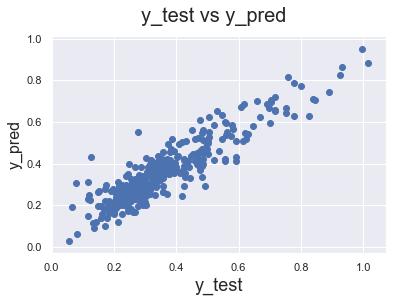

In [109]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

In [110]:
#importing libraries



from sklearn import metrics
import re
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import scale
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline


#### K-Fold CV 

In [111]:
# k-fold CV (using all the 14 variables selected by linear regression model)
lm = LinearRegression()
scores = cross_val_score(lm, X_train_n, y_train, scoring='r2', cv=5)
scores      


array([0.80424868, 0.83919388, 0.85701203, 0.82524345, 0.81484245])

In [112]:

# the other way of doing the same thing (more explicit)
# create a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
scores = cross_val_score(lm, X_train_n, y_train, scoring='r2', cv=folds)
scores 

array([0.82289822, 0.81031231, 0.84292355, 0.83767608, 0.84149054])

In [113]:
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'brier_score_loss',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'mutual_info_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'v_measure_score']

In [114]:
  

# can tune other metrics, such as NMSE
scores = cross_val_score(lm, X_train_n, y_train, scoring='neg_mean_squared_error', cv=5)
scores

array([-0.00551868, -0.00341445, -0.00417361, -0.0058873 , -0.00486687])

In [115]:
# number of features in X_train
len(X_train_n.columns)

14

In [116]:
# step-1: create a cross-validation scheme
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

In [117]:
# step-2: specify range of hyperparameters to tune
hyper_params = [{'n_features_to_select': list(range(1, 14))}]

In [118]:
# step-3: perform grid search
# 3.1 specify model
lm = LinearRegression()
lm.fit(X_train_n, y_train)
rfe = RFE(lm)             

In [119]:
# 3.2 call GridSearchCV()
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

In [120]:
# fit the model
model_cv.fit(X_train_n, y_train)                  

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 13 candidates, totalling 65 fits


[Parallel(n_jobs=1)]: Done  65 out of  65 | elapsed:    1.3s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
       error_score='raise-deprecating',
       estimator=RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False),
  n_features_to_select=None, step=1, verbose=0),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'n_features_to_select': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='r2', verbose=1)

In [123]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.018393,0.003852,0.000967,0.000581,1,{'n_features_to_select': 1},0.441751,0.520749,0.545803,0.507596,0.422231,0.487626,0.047459,13,0.509661,0.492561,0.484449,0.496605,0.516678,0.499991,0.011663
1,0.016974,0.002930,0.003031,0.001680,2,{'n_features_to_select': 2},0.643389,0.682970,0.710601,0.675089,0.659898,0.674389,0.022612,12,0.687263,0.679139,0.671877,0.681920,0.685483,0.681136,0.005418
2,0.016973,0.003285,0.002461,0.002012,3,{'n_features_to_select': 3},0.672692,0.677718,0.729097,0.685580,0.672868,0.687591,0.021274,11,0.697826,0.697382,0.684345,0.696800,0.699602,0.695191,0.005503
3,0.023367,0.015105,0.001267,0.001639,4,{'n_features_to_select': 4},0.716685,0.693318,0.755069,0.758866,0.732116,0.731211,0.024420,9,0.741868,0.747340,0.732790,0.731721,0.739412,0.738626,0.005810
4,0.014954,0.002620,0.003539,0.001892,5,{'n_features_to_select': 5},0.716456,0.693701,0.756170,0.752968,0.731819,0.730223,0.023309,10,0.743287,0.748698,0.734029,0.740624,0.740876,0.741503,0.004732
5,0.015402,0.002251,0.000137,0.000274,6,{'n_features_to_select': 6},0.764332,0.746006,0.805524,0.765925,0.729743,0.762306,0.025342,8,0.796616,0.800925,0.787049,0.742235,0.746950,0.774755,0.025078
6,0.022682,0.007152,0.003125,0.006250,7,{'n_features_to_select': 7},0.765368,0.754976,0.805682,0.829416,0.770636,0.785216,0.027905,7,0.800215,0.802669,0.791074,0.788960,0.799864,0.796556,0.005467
7,0.019687,0.007433,0.003334,0.006181,8,{'n_features_to_select': 8},0.764517,0.759691,0.824408,0.837613,0.782597,0.793765,0.031632,6,0.818918,0.808565,0.805773,0.805592,0.816473,0.811064,0.005570
8,0.014597,0.010458,0.004847,0.006519,9,{'n_features_to_select': 9},0.771632,0.758547,0.820614,0.839263,0.791501,0.796311,0.029980,5,0.823140,0.817017,0.815714,0.814217,0.820108,0.818039,0.003205
9,0.013647,0.003167,0.000000,0.000000,10,{'n_features_to_select': 10},0.771325,0.791842,0.827385,0.839424,0.791233,0.804242,0.025218,4,0.823497,0.827999,0.820120,0.814525,0.820470,0.821322,0.004420


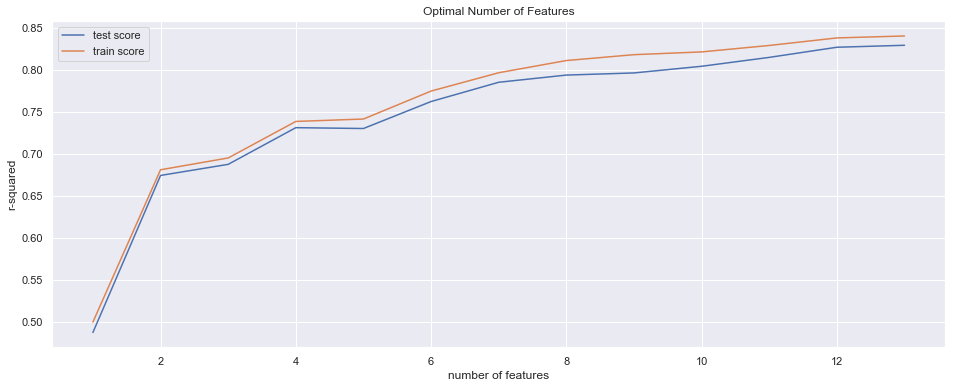

In [124]:
# plotting cv results
plt.figure(figsize=(16,6))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')

In [125]:
# final model
n_features_optimal = 12

lm = LinearRegression()
lm.fit(X_train_n, y_train)

rfe = RFE(lm, n_features_to_select=n_features_optimal)             
rfe = rfe.fit(X_train_n, y_train)

# predict prices of X_test
y_pred = lm.predict(X_test_n)
r2_test= sklearn.metrics.r2_score(y_test, y_pred)
print(r2_test)

0.8337480772702128


This is the result of the test data accuracy of the linear regression without regularisation , now lets see what is the result of regularisation

### Regularisation: Ridge Regression
#### using neg_mean_absolute_error

Let's now try predicting house prices, a dataset used in simple linear regression, to perform ridge regression.

In [126]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', # any other scoring like r2 can also be used here
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    2.7s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [127]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.013933,0.001146,0.003173,0.000973,0.0001,{'alpha': 0.0001},-0.039888,-0.035080,-0.041956,-0.046048,-0.041147,-0.040824,0.003537,23,-0.027420,-0.029234,-0.027568,-0.025693,-0.028440,-0.027671,0.001185
1,0.014311,0.001058,0.001946,0.000672,0.001,{'alpha': 0.001},-0.039881,-0.035068,-0.041944,-0.046014,-0.041142,-0.040810,0.003530,22,-0.027421,-0.029233,-0.027568,-0.025695,-0.028440,-0.027671,0.001184
2,0.013477,0.002229,0.001610,0.001327,0.01,{'alpha': 0.01},-0.039977,-0.034953,-0.041822,-0.045753,-0.041090,-0.040719,0.003478,21,-0.027433,-0.029231,-0.027566,-0.025716,-0.028444,-0.027678,0.001176
3,0.014314,0.001226,0.002137,0.001168,0.05,{'alpha': 0.05},-0.039914,-0.034560,-0.041477,-0.045261,-0.040875,-0.040417,0.003445,20,-0.027483,-0.029232,-0.027577,-0.025819,-0.028463,-0.027715,0.001143
4,0.013179,0.002788,0.003193,0.001304,0.1,{'alpha': 0.1},-0.039599,-0.034173,-0.041177,-0.044884,-0.040646,-0.040096,0.003456,19,-0.027533,-0.029246,-0.027608,-0.025936,-0.028489,-0.027762,0.001108


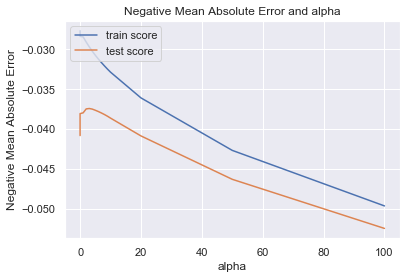

In [128]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

From the graph we can see that at alpha approximately equal to 5 the 

In [129]:
alpha = 5
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([ 2.31697971e-02,  6.24200882e-02,  3.12335511e-02,  4.99951170e-03,
        1.18054737e-01,  1.60892846e-01,  3.70724469e-02,  3.30492988e-02,
        2.23744368e-02,  3.12719191e-02,  6.22915177e-02,  2.32769112e-02,
        2.45102464e-02, -1.46572614e-03, -5.27253272e-02, -2.16392282e-02,
       -1.79593357e-04, -1.67958573e-02,  2.62652528e-03,  4.14572255e-03,
        7.38991849e-03,  1.76054114e-02,  1.71152794e-02, -6.95809020e-03,
       -6.71842373e-03, -6.74547448e-03, -1.82971127e-02, -2.26337327e-02,
       -1.44148520e-02, -1.60715382e-02, -1.28638515e-02,  1.50918014e-02,
        5.54846179e-03,  2.19589725e-02,  1.10344962e-02,  3.65256034e-03,
       -2.21169484e-03, -2.46333912e-03,  1.13096314e-02, -1.37529432e-02,
       -8.71350071e-03, -5.01085342e-04,  0.00000000e+00,  1.13135575e-02,
        4.98550865e-03,  8.50423238e-03, -2.12536238e-02,  4.75684903e-02,
       -2.93520632e-02, -2.90139541e-02, -2.39524517e-02, -2.92383021e-02,
       -2.35732243e-02, -

In [130]:
# model with optimal alpha
# ridge regression

# predict
y_train_pred = ridge.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = ridge.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.9332221372307095
0.8801050095749726


##### a better accuracy is achieved here and not showing a sign of overfitting as well

In [131]:
# ridge model parameters
model_parameters = list(ridge.coef_)
model_parameters.insert(0, ridge.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X_train.columns
cols = cols.insert(0, "constant")
final_ridge_para = list(zip(model_parameters, cols))
final_ridge_para.sort(reverse=True,)
final_ridge_para

[(0.257, 'constant'),
 (0.161, 'GrLivArea'),
 (0.118, '1stFlrSF'),
 (0.067, 'OverallQual_9'),
 (0.066, 'Neighborhood_StoneBr'),
 (0.062, 'LotArea'),
 (0.062, 'GarageArea'),
 (0.053, 'Neighborhood_NoRidge'),
 (0.048, 'Neighborhood_Crawfor'),
 (0.045, 'OverallQual_10'),
 (0.044, 'Exterior1st_BrkFace'),
 (0.042, 'OverallQual_8'),
 (0.038, 'BsmtExposure_Gd'),
 (0.037, 'Neighborhood_NridgHt'),
 (0.037, 'BsmtFullBath'),
 (0.033, 'FullBath'),
 (0.032, 'SaleCondition_Partial'),
 (0.031, 'MasVnrArea'),
 (0.031, 'Fireplaces'),
 (0.026, 'Neighborhood_Veenker'),
 (0.025, 'OverallCond_9'),
 (0.025, 'OpenPorchSF'),
 (0.024, 'GarageType_BuiltIn'),
 (0.023, 'WoodDeckSF'),
 (0.023, 'LotFrontage'),
 (0.022, 'Neighborhood_NPkVill'),
 (0.022, 'MSZoning_RL'),
 (0.022, 'HalfBath'),
 (0.021, 'SaleType_CWD'),
 (0.021, 'OverallCond_7'),
 (0.019, 'SaleType_New'),
 (0.019, 'MasVnrType_BrkFace'),
 (0.019, 'Condition1_PosN'),
 (0.018, 'MSSubClass_60'),
 (0.018, 'Exterior2nd_CmentBd'),
 (0.018, 'Condition1_Norm'),


In [132]:
## checking the coeff of ridge for the features only seleted by regression model

In [133]:
# ridge model parameters for linear regression model features
model_parameters = list(ridge.coef_)
model_parameters.insert(0, ridge.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))


[('constant', 0.257),
 ('GrLivArea', 0.023),
 ('BsmtFullBath', 0.062),
 ('House_age', 0.031),
 ('MSSubClass_90', 0.005),
 ('Neighborhood_Crawfor', 0.118),
 ('Neighborhood_Veenker', 0.161),
 ('Condition1_RRAe', 0.037),
 ('OverallQual_8', 0.033),
 ('OverallQual_9', 0.022),
 ('OverallQual_10', 0.031),
 ('OverallCond_2', 0.062),
 ('OverallCond_3', 0.023),
 ('OverallCond_4', 0.025),
 ('Exterior1st_Stone', -0.001)]

## Lasso regression 
##### score using 'neg_mean_absolute_error'

In [134]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    2.9s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [135]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.043161,0.010358,0.000891,0.001101,0.0001,{'alpha': 0.0001},-0.036381,-0.030648,-0.038029,-0.041152,-0.037482,-0.036738,0.003433,1,-0.028981,-0.030442,-0.029079,-0.027791,-0.029741,-0.029207,0.000881
1,0.026030,0.006739,0.003390,0.000664,0.001,{'alpha': 0.001},-0.041131,-0.034650,-0.044935,-0.047211,-0.042708,-0.042127,0.004265,2,-0.038078,-0.039331,-0.038254,-0.037552,-0.037961,-0.038235,0.000595
2,0.014952,0.001765,0.003155,0.000787,0.01,{'alpha': 0.01},-0.079400,-0.067478,-0.075944,-0.082510,-0.069158,-0.074898,0.005785,3,-0.074577,-0.074746,-0.073686,-0.071571,-0.073340,-0.073584,0.001137
3,0.012202,0.002228,0.003162,0.001250,0.05,{'alpha': 0.05},-0.127917,-0.110897,-0.131471,-0.139150,-0.127910,-0.127469,0.009247,4,-0.124504,-0.129191,-0.128165,-0.125802,-0.127751,-0.127083,0.001694
4,0.011493,0.002050,0.002215,0.001617,0.1,{'alpha': 0.1},-0.131187,-0.114571,-0.131816,-0.139306,-0.129548,-0.129286,0.008087,5,-0.128574,-0.133806,-0.128443,-0.125949,-0.129201,-0.129195,0.002559


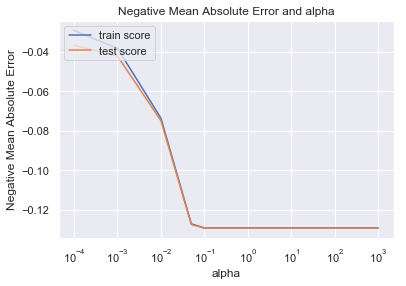

In [136]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.xscale('log')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

### Lasso regression 
#### (also checking r2)

In [137]:
# grid search CV

# set up cross validation scheme
folds = KFold(n_splits = 5, shuffle = True, random_state = 4)

# specify range of hyperparameters
params = {'alpha': [0.001, 0.01, 1.0, 5.0, 10.0]}

# grid search
# lasso model
model = Lasso()
model_cv = GridSearchCV(estimator = model, param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True, verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.5s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
       error_score='raise-deprecating',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.001, 0.01, 1.0, 5.0, 10.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='r2', verbose=1)

In [138]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.026769,0.006849,0.003942,0.001279,0.001,{'alpha': 0.001},0.869868,0.862459,0.876597,0.886987,0.866968,0.872576,0.008544,1,0.902300,0.897090,0.890487,0.894492,0.897059,0.896285,0.003854
1,0.016603,0.001503,0.004092,0.000760,0.01,{'alpha': 0.01},0.641858,0.546557,0.602233,0.670270,0.558746,0.603933,0.047277,2,0.620065,0.613425,0.606028,0.614167,0.607037,0.612145,0.005137
2,0.010987,0.001220,0.003438,0.001103,1,{'alpha': 1.0},-0.006439,-0.009117,-0.002433,-0.014711,-0.000932,-0.006726,0.004931,3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.012119,0.001279,0.002014,0.001719,5,{'alpha': 5.0},-0.006439,-0.009117,-0.002433,-0.014711,-0.000932,-0.006726,0.004931,3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.013413,0.001864,0.001617,0.001980,10,{'alpha': 10.0},-0.006439,-0.009117,-0.002433,-0.014711,-0.000932,-0.006726,0.004931,3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


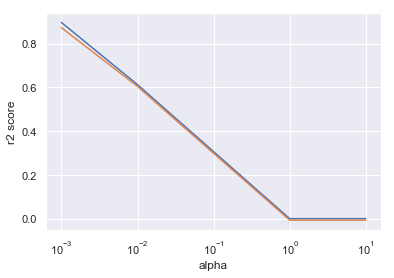

In [139]:
# plot
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('r2 score')
plt.xscale('log')
plt.show()

From the above graph we can see how the test and train accuracy varies with the value of alpha, and a very high value of alpha is not very good for this model, optimising the model at alpha = 0.001

In [140]:
# model with optimal alpha
# lasso regression
lm = Lasso(alpha=0.001)
lm.fit(X_train, y_train)

# predict
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.8929460061616584
0.8653728715037943


In [141]:
# the features selected by linear regression model are in X
model_parameters = list(lm.coef_)
model_parameters.insert(0, lm.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 0.224),
 ('GrLivArea', 0.0),
 ('BsmtFullBath', 0.035),
 ('House_age', 0.006),
 ('MSSubClass_90', 0.0),
 ('Neighborhood_Crawfor', 0.063),
 ('Neighborhood_Veenker', 0.314),
 ('Condition1_RRAe', 0.019),
 ('OverallQual_8', 0.0),
 ('OverallQual_9', 0.0),
 ('OverallQual_10', 0.04),
 ('OverallCond_2', 0.065),
 ('OverallCond_3', 0.0),
 ('OverallCond_4', 0.0),
 ('Exterior1st_Stone', -0.0)]

In [142]:
# all the features
model_parameters = list(lm.coef_)
model_parameters.insert(0, lm.intercept_)
model_parameters = [round(x, 3) for x in model_parameters if model_parameters ]
cols = X_train.columns
cols = cols.insert(0, "constant")
lasso_para = list(zip(model_parameters, cols))
lasso_para.sort(reverse=True)
lasso_para

# sorted list of coeff are shown here in order to show the most impactful features

[(0.314, 'GrLivArea'),
 (0.224, 'constant'),
 (0.109, 'OverallQual_9'),
 (0.065, 'GarageArea'),
 (0.063, '1stFlrSF'),
 (0.057, 'OverallQual_8'),
 (0.053, 'SaleCondition_Partial'),
 (0.04, 'Fireplaces'),
 (0.037, 'Neighborhood_NridgHt'),
 (0.037, 'Neighborhood_Crawfor'),
 (0.035, 'LotArea'),
 (0.033, 'BsmtExposure_Gd'),
 (0.024, 'Neighborhood_NoRidge'),
 (0.021, 'Exterior1st_BrkFace'),
 (0.019, 'BsmtFullBath'),
 (0.016, 'BsmtFinType1_GLQ'),
 (0.014, 'Condition1_Norm'),
 (0.012, 'RoofStyle_Hip'),
 (0.01, 'GarageType_Attchd'),
 (0.01, 'Foundation_PConc'),
 (0.009, 'MSSubClass_60'),
 (0.008, 'OverallCond_7'),
 (0.008, 'MSZoning_RL'),
 (0.008, 'Exterior2nd_CmentBd'),
 (0.007, 'Neighborhood_StoneBr'),
 (0.006, 'MasVnrArea'),
 (0.005, 'HouseStyle_1Story'),
 (0.001, 'SaleCondition_Normal'),
 (0.0, 'WoodDeckSF'),
 (-0.0, 'SaleType_WD'),
 (0.0, 'SaleType_Oth'),
 (0.0, 'SaleType_New'),
 (-0.0, 'SaleType_ConLw'),
 (-0.0, 'SaleType_ConLI'),
 (-0.0, 'SaleType_ConLD'),
 (0.0, 'SaleType_Con'),
 (0.0, 

In [ ]:
#  we can check the actual and predicted prices using these features
y_test_pred_lasso=pd.DataFrame(y_test_pred)
# adding Id to the dataframe
y_test_pred_lasso.index=y_test.index
# we can check the prices predicted by the regression.
HousePrice = pd.DataFrame()
HousePrice['Id'] = y_test_pred_lasso.index
HousePrice['Actual_SalePrice'] =y_test.values
HousePrice['Pred_SalePrice'] = y_test_pred_lasso.values
HousePrice.head()

#### linear regression features

### Comparison of Lasso and Ridge regression results:

#### Final variables that have some significant impact on House price according to Ridge regression are:

### Final variables that have impact on House price according to Lasso regression are: